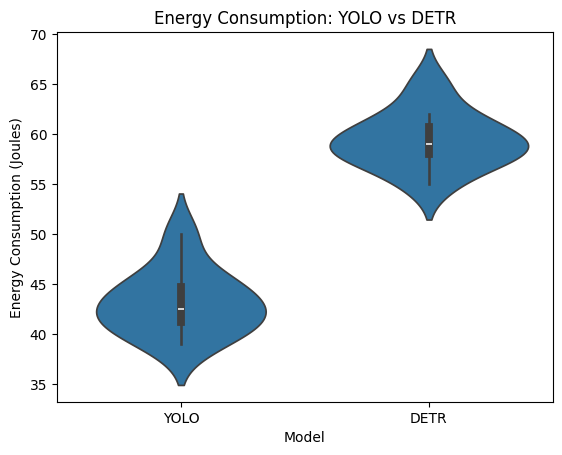

In [37]:
# uncomment + run if they aren't installed already
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# df_yolo = pd.read_csv("data/yolo.csv")
# df_detr = pd.read_csv("data/detr.csv")

# Temporary for testing
df_yolo = pd.DataFrame([42, 45, 39, 44, 50, 41, 43, 46, 40, 42])
df_detr = pd.DataFrame([55, 62, 58, 59, 65, 57, 60, 58, 61, 59])

labels = ['YOLO', 'DETR']

data = pd.DataFrame({
    'Energy': np.concatenate([df_yolo.values.flatten(), df_detr.values.flatten()]),
    'Model': ['YOLO']*10 + ['DETR']*10
})

# Violin + Box plots
sns.violinplot(data=data, x='Model', y='Energy', inner='box')
plt.xticks(ticks=[0, 1], labels=labels)
plt.ylabel('Energy Consumption (Joules)')
plt.title('Energy Consumption: YOLO vs DETR')

plt.show()

In [38]:
# !pip install scipy

from scipy.stats import ttest_ind

# if data is not normal (see the violin plots), then we need other tests / procedures

# Statistical significance test (Welch's t-test)
_,pvalue = ttest_ind(
    df_yolo.values, df_detr.values, equal_var=False, alternative='two-sided')

if pvalue < 0.05:
    print(f'P-value is significant ({pvalue[0]})')
else:
    print(f'P-value is not significant ({pvalue[0]})')

P-value is significant (6.413718167886877e-10)


In [39]:
# Effect size analysis (assuming data is normal)

mean_diff = abs(df_yolo.values.mean() - df_detr.values.mean())
percentage_change = (mean_diff / df_yolo.values.mean()) * 100
cohen_d = mean_diff / (0.5 * np.sqrt(np.square(df_yolo.values.std()) + np.square(df_detr.values.std())))

print(f'Mean difference: {mean_diff:.2f}')
print(f'Percentage change: {percentage_change:.2f}')
print(f'Cohen\'s Difference: {cohen_d:.2f}')

Mean difference: 16.20
Percentage change: 37.50
Cohen's Difference: 8.00
